# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [16]:
import numpy as np

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject
from types import SimpleNamespace
from scipy import optimize
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

%load_ext autoreload
%autoreload 2




The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload



### 2.1. <a id='toc2_1_'></a>[Basic Edgeworth box](#toc0_)

# Question 1

**Explain how you solve the model**

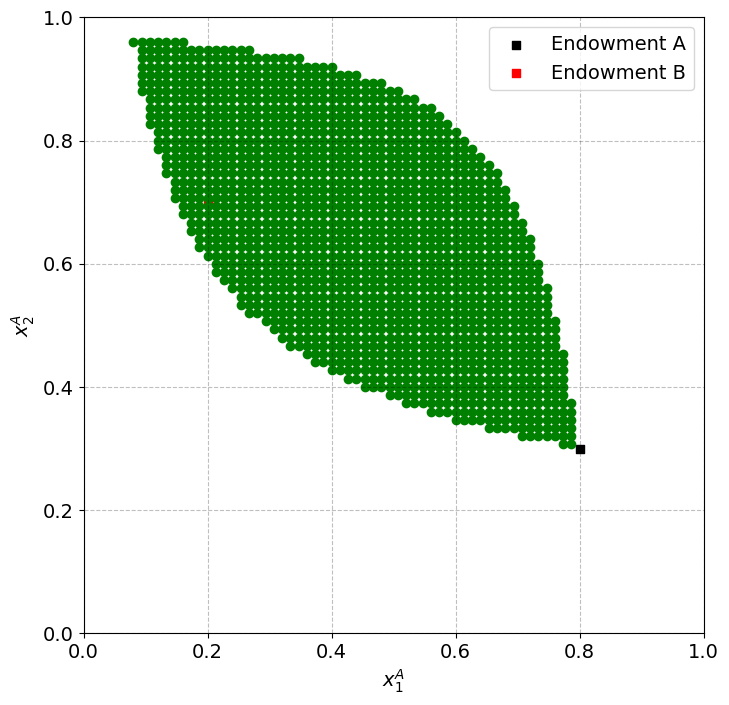

In [17]:
# code for solving the model (remember documentation and comments)

from Question1 import EdgeworthBoxClass 

box = EdgeworthBoxClass()

# The Edgeworth box with Pareto improvements for set C
box.plot_edgeworth_box()

# Question 2

Explain your code and procedure

In [18]:


class ErrorMarketClass:
    def __init__(self):
        par = self.par = SimpleNamespace()
        # a. parameters
        par.alpha = 1/3 
        par.beta = 2/3
        # b. Initial endowment
        par.w1A = 0.8
        par.w2A = 0.3
        # c. Numeraire
        par.p2 = 1
        # d. Number of allocation
        self.N = 75

    def utility_A(self, x1A, x2A):
        # Utility for Consumer A using Cobb-Douglas
        return x1A ** self.par.alpha * x2A ** (1 - self.par.alpha)

    def utility_B(self, x1B, x2B):
        # Utility for Consumer B using Cobb-Douglas
        return x1B ** self.par.beta * x2B ** (1 - self.par.beta)

    def demand_A(self, p1):
        # Optimal demand function for Consumer A's two goods, x1A_star, x2A_star
        x1A_star = self.par.alpha * (p1 * self.par.w1A + self.par.p2 * self.par.w2A) / p1
        x2A_star = (1 - self.par.alpha) * (p1 * self.par.w1A + self.par.p2 * self.par.w2A) / self.par.p2
        return x1A_star, x2A_star

    def demand_B(self, p1):
        # Optimal demand function for Consumer B two goods, x1B_star, x2B_star
        x1B_star = self.par.beta * (p1 * (1 - self.par.w1A) + self.par.p2 * (1 - self.par.w2A)) / p1
        x2B_star = (1 - self.par.beta) * (p1 * (1 - self.par.w1A) + self.par.p2 * (1 - self.par.w2A)) / self.par.p2
        return x1B_star, x2B_star

    def check_market_clearing(self):
        # Finding the market clearing condition
        par = self.par
        # 
        self.rho1 = [0.5 + 2 * i / self.N for i in range(self.N + 1)]

        errors = []

        for p1 in self.rho1:
            # Iterate through different price levels of p1 in rho1 and calculating the errors in the market clearing condition
            x1A_star, x2A_star = self.demand_A(p1)
            x1B_star, x2B_star = self.demand_B(p1)
            # Errors, eps1 and eps2 in the market clearing condition 
            eps1 = x1A_star - par.w1A + x1B_star - (1 - par.w1A)
            eps2 = x2A_star - par.w2A + x2B_star - (1 - par.w2A)
            # storing the errors
            errors.append((eps1, eps2))

        return errors




errormarket = ErrorMarketClass()
result = errormarket.check_market_clearing()

# printing the errors in the market clearing condition
print("Errors in the market clearing condition:")
for eps1, eps2 in result:
    print(f"Error 1: {eps1}, Error 2: {eps2}")



Errors in the market clearing condition:
Error 1: 0.533333333333333, Error 2: -0.2666666666666666
Error 1: 0.47594936708860747, Error 2: -0.25066666666666654
Error 1: 0.42409638554216855, Error 2: -0.23466666666666652
Error 1: 0.3770114942528735, Error 2: -0.2186666666666665
Error 1: 0.33406593406593377, Error 2: -0.2026666666666665
Error 1: 0.2947368421052629, Error 2: -0.18666666666666654
Error 1: 0.2585858585858586, Error 2: -0.1706666666666664
Error 1: 0.22524271844660193, Error 2: -0.1546666666666665
Error 1: 0.19439252336448576, Error 2: -0.1386666666666665
Error 1: 0.16576576576576557, Error 2: -0.12266666666666659
Error 1: 0.13913043478260856, Error 2: -0.10666666666666658
Error 1: 0.11428571428571421, Error 2: -0.09066666666666645
Error 1: 0.09105691056910548, Error 2: -0.07466666666666644
Error 1: 0.06929133858267705, Error 2: -0.05866666666666642
Error 1: 0.048854961832061006, Error 2: -0.04266666666666663
Error 1: 0.029629629629629395, Error 2: -0.026666666666666616
Error 1

# Question 3

Finding a market clearing price in `Question3.py`

In [19]:
from Question3 import MarketClearPriceClass

In [20]:

# Initial parameters
endowments = (0.8, 0.3)
alphas = 1/3
betas = 2/3
N = 75  # value of N in rho1

# Set up optimization problem
initial_guess = ((0.5+3)*1/N, 1)  # Initial guess for prices p1 in rho1 and p2 is numeraire
bounds = [(0.5, 2.5), (None, None)]  # Bounds for p1 and p2 (lower, upper)

# Create an instance of MarketClearPriceClass
market_clear_price = MarketClearPriceClass()

# Call the optimizer with the objective function
res = optimize.minimize(
    lambda price: market_clear_price.objective_function(endowments, alphas, betas, N), initial_guess,
    method="SLSQP", bounds=bounds
)

# Extract the market clearing price p1 from the optimization result
market_clearing_price_p1 = res.x[0]
print("Market Clearing Price (p1):", market_clearing_price_p1)



Market Clearing Price (p1): 0.5


Explain your code and procedure

# Question 4a

# Question 4b

# Question 5a

Defining a solver in `Question5a.py`



In [21]:
from Question5a import AgentOptimization

Find the allocation if the choice set is restricted to C



In [23]:

# Initial guess for x_A1 and x_A2
x0 = [0.5, 0.5]  # Initial guess for x_A1 and x_A2
alpha = 1/3  # Example value for alpha

# Define the bounds for x_A1 and x_A2
bounds = [(0, 1), (0, 1)]

# Create an instance of AgentOptimization and solve the problem
agent_opt = AgentOptimization(0.8, 0.3, x0, alpha, bounds)
optimal_allocation, optimal_utility = agent_opt.solve()

# Print the optimal solution
print("Optimal Allocation for Agent A:", optimal_allocation) # find the allocation



Optimal Allocation for Agent A: [0.41601676 0.41601676]


# Question 5b

In [4]:
from Question5b import AgentOptimization2


x0 = [0.5, 0.5]  # Initial guess for x_A1 and x_A2
alpha = 1/3  # Example value for alpha

# Create an instance of AgentOptimization and solve the problem
agent_opt = AgentOptimization2(x0, alpha)
optimal_allocation, optimal_utility = agent_opt.solve()

# Print the optimal solution
print("Optimal Allocation for Agent A:", optimal_allocation)

ImportError: cannot import name 'AgentOptimization2' from 'Question5b' (c:\Users\sheng\OneDrive\Skrivebord\Numerical analysis\projects-2024-sheng-og-anton\inauguralproject\Question5b.py)

# Question 6a

# Question 6b

# Question 7

# Question 8


ADD CONCISE CONLUSION.